In [1]:
%pip install lxml html5lib beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn import kernel_ridge
import transfer_data

# Transfer Data

In [3]:
transfer_data.players

,Name,Year,Previous School,Games Played at Previous School,Games Played at GT,Total Games Played,Total Points Scored at Previous School,Total Points Scored at GT,Total Points Scored
0,James Banks,2018,University of Texas,46,62,108,76,619,695
1,Bubba Parham,2019,Virginia Military Institute,62,58,120,1125,327,1452
2,Jordan Usher,2019,University of South Carolina,48,81,129,274,963,1237
3,Kyle Sturdivant,2020,University of South Carolina,21,94,115,43,647,690
4,Rodney Howard,2020,University of Georgia,24,70,94,31,342,373
5,Deivon Smith,2021,Mississippi State University,33,48,81,173,328,501
6,Ja'von Franklin,2022,University of South Alabama,28,32,60,29,310,339
7,Lance Terry,2022,Gardner-Webb University,54,29,83,598,294,892


<Axes: xlabel='Games Played at GT', ylabel='Total Points Scored at GT'>

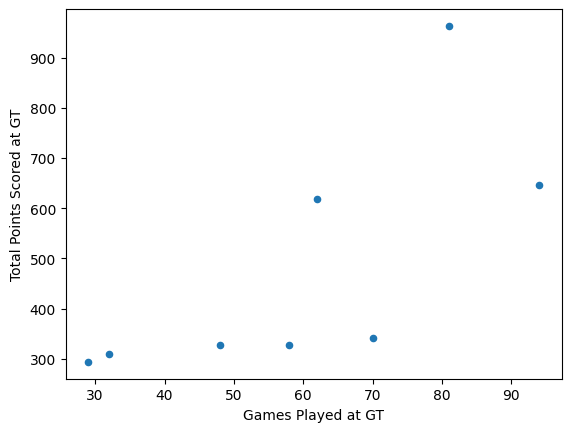

In [4]:
transfer_data.players.plot(kind='scatter', x='Games Played at GT', y='Total Points Scored at GT')

<Axes: xlabel='Games Played at Previous School', ylabel='Total Points Scored at Previous School'>

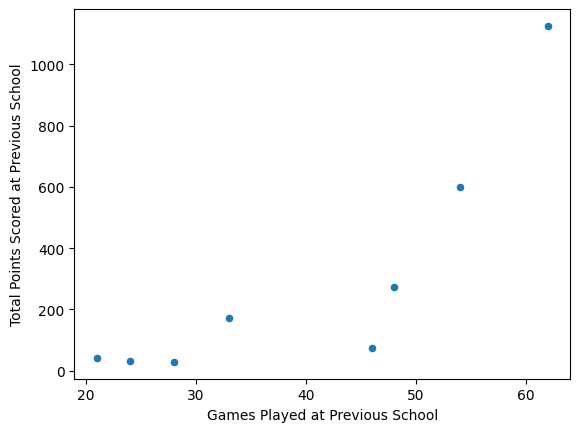

In [5]:
transfer_data.players.plot(kind='scatter', x='Games Played at Previous School', y='Total Points Scored at Previous School')

<Axes: xlabel='Total Games Played', ylabel='Total Points Scored'>

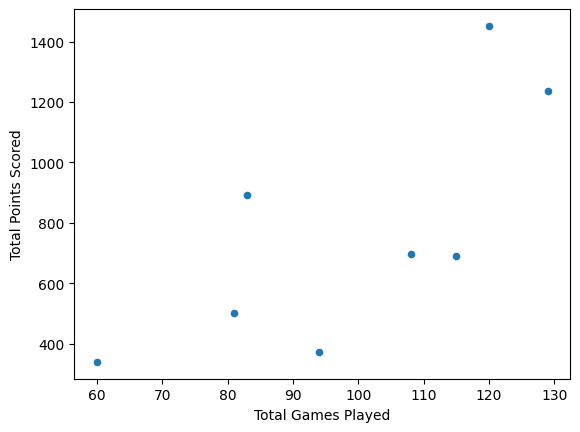

In [6]:
transfer_data.players.plot(kind='scatter', x='Total Games Played', y='Total Points Scored')

# GT 2023 Season Data

In [8]:
url = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59'
gt_stats = pd.read_html(url)
gt_stats

[                    Name
 0          Miles Kelly G
 1       Dallan Coleman G
 2       Tyzhaun Claude F
 3   Kowacie Reeves Jr. G
 4      Kyle Sturdivant G
 5         Amaree Abram G
 6     Ebenezer Dowuona F
 7       Ibrahima Sacko F
 8        Tafara Gapare F
 9        Carter Murphy G
 10                 Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO   FG%   FT%   3P%
 0    3  33.3  21.0   6.3   2.0  1.3  0.7   1.3  37.7  57.1  25.0
 1    3  28.7  16.0   3.0   0.3  0.7  0.3   0.0  62.5  60.0  56.3
 2    3  27.3  12.7   8.3   2.3  1.0  0.0   0.7  43.8  56.3  20.0
 3    3  34.0  11.3   4.3   1.7  1.3  1.3   1.0  45.8  88.9  33.3
 4    3  25.3  10.3   2.0   4.3  0.3  0.0   1.3  46.7  50.0  25.0
 5    3  16.7   6.0   2.7   2.0  0.3  0.3   2.0  27.8  66.7  20.0
 6    3   5.3   2.0   2.0   0.0  0.0  0.3   0.7  75.0   0.0   0.0
 7    3  15.0   1.0   5.0   0.3  1.3  0.0   1.0  20.0  25.0   0.0
 8    3  13.3   0.7   2.0   0.3  0.7  1.3   1.3  11.1   0.0   0.0
 9    1   3.0   0.0   0.0  

In [11]:
gt_stats_data = {
    'Name': gt_stats[0]['Name'][:-1],
    'Games Played': gt_stats[1]['GP'][:-1],
    'Points Scored': gt_stats[3]['PTS'][:-1]
}
gt_stats_df = pd.DataFrame(gt_stats_data)
gt_stats_df

,Name,Games Played,Points Scored
0,Miles Kelly G,3,63
1,Dallan Coleman G,3,48
2,Tyzhaun Claude F,3,38
3,Kowacie Reeves Jr. G,3,34
4,Kyle Sturdivant G,3,31
5,Amaree Abram G,3,18
6,Ebenezer Dowuona F,3,6
7,Ibrahima Sacko F,3,3
8,Tafara Gapare F,3,2
9,Carter Murphy G,1,0


<Axes: xlabel='Name'>

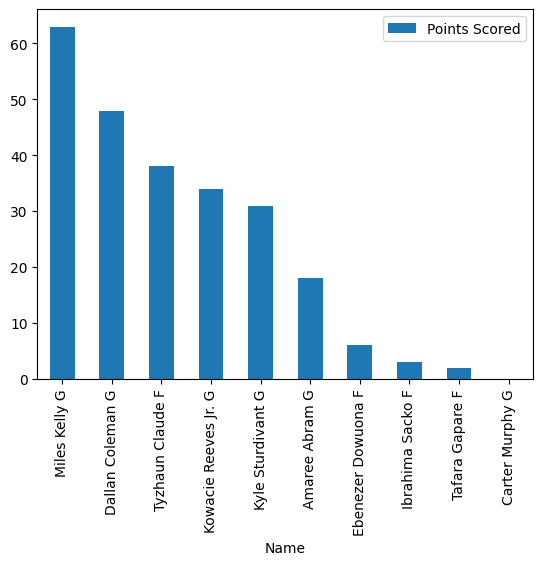

In [12]:
gt_stats_df.plot(kind='bar', x='Name', y='Points Scored')